# Âü∫‰∫éHDDMÊãüÂêà2back‰ªªÂä°

## 1.Âä†ËΩΩpackages

In [1]:
import sys

print("Python ÁâàÊú¨:", sys.version)

Python ÁâàÊú¨: 3.9.13 | packaged by conda-forge | (main, May 27 2022, 16:56:21) 
[GCC 10.3.0]


In [2]:
%matplotlib inline

# scitnific computing and plotting
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns

# HDDM related packages
import pymc as pm
import hddm
import kabuki
import arviz as az
print("The current HDDM version is: ", hddm.__version__)
print("The current kabuki version is: ", kabuki.__version__)
print("The current PyMC version is: ", pm.__version__)
print("The current ArviZ version is: ", az.__version__)

The current HDDM version is:  1.0.1RC
The current kabuki version is:  0.6.5RC4
The current PyMC version is:  2.3.8
The current ArviZ version is:  0.15.1


## 2.ÂØºÂÖ•Êï∞ÊçÆÈõÜ

In [3]:
! pip install openpyxl

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 250.9/250.9 kB 884.4 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 24.1.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import pandas as pd
import hddm
import matplotlib.pyplot as plt
import seaborn as sns

# ËØªÂèñ Excel Êñá‰ª∂
file_path = './rawdata.xlsx'
trial_data = pd.read_excel(file_path)

# Ê∏ÖÁêÜÂàóÂêç‰∏≠ÁöÑÁ©∫Ê†º
trial_data.columns = trial_data.columns.str.strip()

# Á°Æ‰øùÂèçÂ∫îÊó∂Èó¥Âàó 'rt' Ë¢´ËΩ¨Êç¢‰∏∫ÊµÆÁÇπÊï∞Á±ªÂûã
trial_data['rt'] = pd.to_numeric(trial_data['rt'], errors='coerce')

# Á°Æ‰øù 'Group' ÂàóÁöÑÊï∞ÊçÆÁ±ªÂûã‰∏∫Â≠óÁ¨¶‰∏≤ÔºåÂπ∂ÂéªÈô§ÂèØËÉΩÁöÑÁ©∫Ê†º
trial_data['Group'] = trial_data['Group'].astype(str).str.strip()

# Ê£ÄÊü•Êï∞ÊçÆ
print(trial_data.tail())
print(f"The number of trials: {trial_data.shape[0]}")
print(f"The number of variables: {trial_data.shape[1]}")
print(f"The number of participants: {trial_data['subj_idx'].unique().shape[0]}")

# ÈáçÊñ∞ÂëΩÂêçÂøÖË¶ÅÁöÑÂàóÔºåÁ°Æ‰øù‰∏é HDDM ÁöÑË¶ÅÊ±Ç‰∏ÄËá¥
data = hddm.utils.flip_errors(trial_data)

# Êï∞ÊçÆÊ£ÄÊü•ÂÆåÊàêÔºåÂáÜÂ§áÂêéÁª≠Ê®°ÂûãÁöÑÊûÑÂª∫

          ID  subj_idx  response     rt Group
16296  16363       272         1  0.123     1
16297  16364       272         1  0.172     1
16298  16365       272         0  0.027     1
16299  16366       272         0  0.023     1
16300  16367       272         0  0.143     1
The number of trials: 16301
The number of variables: 5
The number of participants: 211


In [5]:
data=trial_data

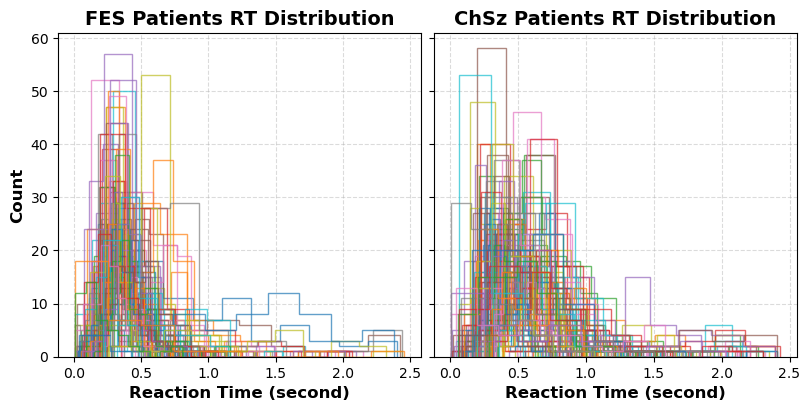

In [6]:
import matplotlib.pyplot as plt

# ÂàÜÁªÑÊ†áÁ≠æÊò†Â∞ÑÔºàÂ≠óÁ¨¶‰∏≤Á±ªÂûãÔºâ
group_labels = {
    '1': 'FES Patients',
    '2': 'ChSz Patients'
}

# Á°Æ‰øùÁªÑÁöÑÈ°∫Â∫è‰∏∫ ['1', '2']
groups = ['1', '2']

# ÂàõÂª∫Â≠êÂõæ
fig, axs = plt.subplots(1, len(groups), figsize=(8, 4), sharey=True, constrained_layout=True)

for idx, group in enumerate(groups):
    group_data = data[data['Group'] == group]
    ax = axs[idx]  # ÂΩìÂâçÂ≠êÂõæ
    ax.set_title(f"{group_labels[group]} RT Distribution", fontsize=14, weight='bold')
    
    # ÁªòÂà∂ÊØè‰∏™ subj_idx ÁöÑÂèçÂ∫îÊó∂Èó¥ÂàÜÂ∏É
    for subj_idx, subj_data in group_data.groupby('subj_idx'):
        subj_data.rt.hist(bins=10, histtype='step', ax=ax, alpha=0.7)
    
    ax.set_xlabel('Reaction Time (second)', fontsize=12, weight='bold')
    if idx == 0:  # ‰ªÖÂú®Á¨¨‰∏Ä‰∏™Â≠êÂõæ‰∏≠ËÆæÁΩÆ Y ËΩ¥Ê†áÁ≠æ
        ax.set_ylabel('Count', fontsize=12, weight='bold')
    
    # Ê∑ªÂä†ÁΩëÊ†ºÁ∫ø
    ax.grid(axis='both', linestyle='--', alpha=0.45)  # ËÆæÁΩÆÁΩëÊ†ºÁ∫ø‰∏∫ËôöÁ∫øÔºåÈÄèÊòéÂ∫¶‰∏∫ 0.7

# ‰øùÂ≠òÂõæÂÉè
plt.savefig('rt_distributions_by_group_with_grid.jpg', dpi=1200, bbox_inches='tight')
plt.show()

In [7]:
# Ê£ÄÊü• Group ÂàóÁöÑÂîØ‰∏ÄÂÄºÂèäÂÖ∂Êï∞ÊçÆÁ±ªÂûã
print(data['Group'].unique())
print(data['Group'].dtype)

# Á°Æ‰øù Group ÂàóÁöÑÂÄº‰∏∫Â≠óÁ¨¶‰∏≤Á±ªÂûãÔºåÂπ∂ÁßªÈô§ÂèØËÉΩÂ≠òÂú®ÁöÑÁ©∫Ê†º
data['Group'] = data['Group'].astype(str).str.strip()

# ÂÜçÊ¨°ËÆ°ÁÆó Group 1 Âíå Group 2 ‰∏≠ÁöÑÂîØ‰∏ÄË¢´ËØïÊï∞Èáè
unique_group1_subjects = data[data['Group'] == '1']['subj_idx'].nunique()
unique_group2_subjects = data[data['Group'] == '2']['subj_idx'].nunique()

print(f"First episode of schizophrenia = {unique_group1_subjects}")
print(f"Chronic schizophrenia = {unique_group2_subjects}")

['2' '1']
object
First episode of schizophrenia = 103
Chronic schizophrenia = 108


#### 1.Ê®°ÂûãËÆæËÆ°

In [8]:
import hddm

# ÊâìÂç∞Êï∞ÊçÆÁöÑÁ±ªÂûãÔºåÁ°Æ‰øùÊï∞ÊçÆÊ†ºÂºèÊ≠£Á°Æ
# Êï∞ÊçÆÂ∫î‰∏∫‰∏Ä‰∏™ Pandas DataFrameÔºåÂåÖÂê´ÂèçÂ∫îÊó∂Èó¥ÔºàRTÔºâ„ÄÅÊ≠£Á°ÆÊÄßÔºàaccuracyÔºâ‰ª•ÂèäÁªÑÂà´Á≠âÂàó
print(f"Data type: {type(data)}")

# Âü∫Á°ÄÊ®°ÂûãÔºàm0ÔºâÔºöÂåÖÂê´ÊâÄÊúâÊ†∏ÂøÉÂèÇÊï∞ÂíåÂèòÂºÇÊÄßÂèÇÊï∞
# ËØ•Ê®°Âûã‰∏çËÄÉËôëÊù°‰ª∂ÊàñÁªÑÂà´ÔºåÂè™Áî®‰∫éÂÖ®Â±ÄÂèÇÊï∞‰º∞ËÆ°
m0 = hddm.HDDM(
    data, 
    include=['a', 'v', 't', 'z', 'sv', 'sz', 'st']  # ÂåÖÂê´ÊâÄÊúâÂèÇÊï∞ÂíåÂèòÂºÇÊÄßÂèÇÊï∞
)

# ÁªºÂêàÊ®°ÂûãÔºàm2ÔºâÔºöÂàÜÂ±ÇÊ®°ÂûãÔºåÊé¢Á¥¢ÊâÄÊúâÁªÑÂà´Èó¥ÂèÇÊï∞ÁöÑÂèòÂåñ
# ÂÅáËÆæÊ†∏ÂøÉÂèÇÊï∞Ôºàa, v, t, zÔºâ‰æùËµñ‰∫éÁªÑÂà´ÔºàGroupÔºâ
m1 = hddm.HDDM(
    data, 
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],  # ÂåÖÂê´ÊâÄÊúâÊ†∏ÂøÉÂèÇÊï∞ÂíåÂèòÂºÇÊÄßÂèÇÊï∞
    depends_on={  # ÂÅáËÆæÂèÇÊï∞‰æùËµñ‰∫éÁªÑÂà´
        'a': ['Group'], 
        'v': ['Group'], 
        't': ['Group'],
        'z': ['Group']
    }
)


# ÂõûÂΩíÊ®°ÂûãÔºàm3vÔºâÔºöÂàÜÊûêÁªÑÂà´ÂØπÊºÇÁßªÁéáÔºàvÔºâÁöÑÂΩ±Âìç
m2v = hddm.HDDMRegressor(
    data,
    "v ~ 1 + C(Group, Treatment('2'))",  # ÊºÇÁßªÁéá v ÁöÑÂõûÂΩíÂÖ¨ÂºèÔºåGroup ‰∏∫ÂàÜÁªÑÂèòÈáèÔºå'2' ‰∏∫ÂèÇËÄÉÁªÑ
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],  # ÂåÖÂê´ÊâÄÊúâÊ†∏ÂøÉÂèÇÊï∞ÂíåÂèòÂºÇÊÄßÂèÇÊï∞
    group_only_regressors=False,  # ÂÖÅËÆ∏‰∏™‰ΩìÂ±ÇÈù¢ÁöÑÂèòÂåñ
    keep_regressor_trace=True  # ‰øùÁïôÂõûÂΩíÁ≥ªÊï∞ÁöÑ MCMC ÈááÊ†∑ËΩ®Ëøπ
)

# ÂõûÂΩíÊ®°ÂûãÔºàm3zÔºâÔºöÂàÜÊûêÁªÑÂà´ÂØπËµ∑ÂßãÁÇπÂÅèÁßªÔºàzÔºâÁöÑÂΩ±Âìç
m2z = hddm.HDDMRegressor(
    data,
    "z ~ 1 + C(Group, Treatment('2'))",  # Ëµ∑ÂßãÁÇπ z ÁöÑÂõûÂΩíÂÖ¨Âºè
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],
    group_only_regressors=False,
    keep_regressor_trace=True
)

# ÂõûÂΩíÊ®°ÂûãÔºàm3aÔºâÔºöÂàÜÊûêÁªÑÂà´ÂØπÂÜ≥Á≠ñÁïåÈôêÔºàaÔºâÁöÑÂΩ±Âìç
m2a = hddm.HDDMRegressor(
    data,
    "a ~ 1 + C(Group, Treatment('2'))",  # ÂÜ≥Á≠ñÁïåÈôê a ÁöÑÂõûÂΩíÂÖ¨Âºè
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],
    group_only_regressors=False,
    keep_regressor_trace=True
)

# ÂõûÂΩíÊ®°ÂûãÔºàm3tÔºâÔºöÂàÜÊûêÁªÑÂà´ÂØπÈùûÂÜ≥Á≠ñÊó∂Èó¥ÔºàtÔºâÁöÑÂΩ±Âìç
m2t = hddm.HDDMRegressor(
    data,
    "t ~ 1 + C(Group, Treatment('2'))",  # ÈùûÂÜ≥Á≠ñÊó∂Èó¥ t ÁöÑÂõûÂΩíÂÖ¨Âºè
    include=['a', 'v', 't', 'z', 'sv', 'st', 'sz'],
    group_only_regressors=False,
    keep_regressor_trace=True
)

# ÊâìÂç∞Ê®°ÂûãÂàùÂßãÂåñÂÆåÊàêÁöÑ‰ø°ÊÅØ
print('Ê®°ÂûãÂ∑≤ÊàêÂäüÂàùÂßãÂåñÔºÅüòÑ')

Data type: <class 'pandas.core.frame.DataFrame'>
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
No model attribute --> setting up standard HDDM
Set model to full_ddm
Ê®°ÂûãÂ∑≤ÊàêÂäüÂàùÂßãÂåñÔºÅüòÑ


#### 2.Ê®°ÂûãÊãüÂêàÂèÇÊï∞Èáè 

In [9]:
def run_sampling(
    m,
    n_samples=10000,  # 10,000
    n_burn=5000,     # 5000
    n_chains=4,      # 4
    thin=2,  # ThinningÔºöÊØèÈöî2‰∏™Ê†∑Êú¨‰øùÁïô1‰∏™
    model_name="m",
    progress_bar=True
):
    m_infdata = m.sample(
        n_samples,
        burn=n_burn,
        chains=n_chains,
        return_infdata=True,
        save_name="8.model_fitted/" + model_name,
        progress_bar=progress_bar
    )

    return m, m_infdata


# ËÆ°ÁÆóÊó∂Èó¥‰º∞ËÆ°
print('ÊãüÂêàÂèÇÊï∞ËÆæÁΩÆÊàêÂäü!')

ÊãüÂêàÂèÇÊï∞ËÆæÁΩÆÊàêÂäü!


**Ê≥®ÔºöÂú®ÈÖçÂ§á 2.90GHz Ëã±ÁâπÂ∞î¬ÆÈÖ∑Áùø‚Ñ¢i7-10700 Â§ÑÁêÜÂô®ÁöÑÁîµËÑë‰∏äÔºåÁî®‰∏äËø∞ËÆæÁΩÆÔºà10000 ‰∏™Ê†∑Êú¨ÔºâÊãüÂêàÊâÄÊúâËøôÂÖ≠‰∏™Ê®°ÂûãÂ§ßÁ∫¶ÈúÄË¶Å 8-9 ‰∏™Â∞èÊó∂„ÄÇÊ≠§Â§ñÔºåÂÜÖÂ≠òÂ∫îË∂≥Â§üÂ§ßÔºåÂª∫ËÆÆ‰ΩøÁî® ~ 64 G ÂÜÖÂ≠ò„ÄÇÂê¶ÂàôÔºåÂª∫ËÆÆ‰ΩøÁî®Â∞ëÈáèÊ†∑Êú¨ÔºàÂ¶Ç n_samples=2500Ôºåburn=1000Ôºâ„ÄÇ

#### 3.ËØªÂèñ‰πãÂâçÂ•ΩÁöÑÊ®°ÂûãüòÇ

In [10]:
import pickle

# Ê®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆÁöÑÊñá‰ª∂Âêç
model_names = ["m0","m1"] 
 
# ÂàõÂª∫Â≠óÂÖ∏Â≠òÂÇ®Ê®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
models = {}
infdata = {}

# Âä†ËΩΩÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
for name in model_names:
    model_file_path = f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{name}_model.pkl'
    infdata_file_path = f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{name}_infdata.pkl'
    
    # ÈáçÊñ∞Âä†ËΩΩÊ®°Âûã
    with open(model_file_path, 'rb') as f_model:
        models[name] = pickle.load(f_model)
    
    # ÈáçÊñ∞Âä†ËΩΩÊé®Êñ≠Êï∞ÊçÆ
    with open(infdata_file_path, 'rb') as f_infdata:
        infdata[name] = pickle.load(f_infdata)
    
    # Âä®ÊÄÅËµãÂÄºÂõûÂéüÂßãÂèòÈáèÂêç
    globals()[name] = models[name]
    globals()[f"{name}_infdata"] = infdata[name]
    
    print(f"{name} Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!")

# ÊâìÂç∞Â∑≤Âä†ËΩΩÁöÑÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆ
for name in model_names:
    print(f"{name} Ê®°Âûã:", globals()[name])
    print(f"{name} Êé®Êñ≠Êï∞ÊçÆ:", globals()[f"{name}_infdata"])

print('ÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆËØªÂèñÊàêÂäü!üòÇ')

m0 Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!
m1 Â∑≤ÁªèÊàêÂäüÊåÇËΩΩ!
m0 Ê®°Âûã: <hddm.models.hddm_info.HDDM object at 0x7f49e1973880>
m0 Êé®Êñ≠Êï∞ÊçÆ: Inference data with groups:
	> posterior
	> observed_data
m1 Ê®°Âûã: <hddm.models.hddm_info.HDDM object at 0x7f49e9e0ed00>
m1 Êé®Êñ≠Êï∞ÊçÆ: Inference data with groups:
	> posterior
	> observed_data
ÊâÄÊúâÊ®°ÂûãÂíåÊé®Êñ≠Êï∞ÊçÆËØªÂèñÊàêÂäü!üòÇ


In [11]:
import pickle

# ÂÆö‰πâÊ®°ÂûãÂêçÁß∞ÂàóË°®
model_names = ["m0","m1"]
posterior_distributions = {}

# Âæ™ÁéØÂä†ËΩΩÊØè‰∏™Ê®°ÂûãÂπ∂ÊèêÂèñÂêéÈ™åÂàÜÂ∏É
for model_name in model_names:
    print(f"ÊèêÂèñ {model_name} ÁöÑÂêéÈ™åÂàÜÂ∏É...")
    
    # Âä†ËΩΩÊ®°Âûã
    with open(f'./2.Ê®°ÂûãÊãüÂêà-ËæìÂá∫/{model_name}_model.pkl', 'rb') as f_model:
        model_loaded = pickle.load(f_model)
    
    # ÊèêÂèñÂêéÈ™åÂàÜÂ∏É
    posterior_samples = model_loaded.get_traces()
    
    # Â∞ÜÊØè‰∏™Ê®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÂ≠òÂÇ®Âú®Â≠óÂÖ∏‰∏≠
    posterior_distributions[model_name] = posterior_samples
    
    # ÊâìÂç∞ÊèêÂèñÁöÑÂêéÈ™åÂàÜÂ∏ÉÁöÑÂâçÂá†Ë°å
    print(f"{model_name}ÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:")

print("ÊâÄÊúâÊ®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàêÔºÅüòÇ")


#Âæó20ÂàÜÈíü

ÊèêÂèñ m0 ÁöÑÂêéÈ™åÂàÜÂ∏É...
m0ÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:
ÊèêÂèñ m1 ÁöÑÂêéÈ™åÂàÜÂ∏É...
m1ÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàê:
ÊâÄÊúâÊ®°ÂûãÁöÑÂêéÈ™åÂàÜÂ∏ÉÊèêÂèñÂÆåÊàêÔºÅüòÇ


#### 4.Êü•ÁúãÂÜÖÂ≠ò

In [12]:
import psutil
print(f"Available memory: {psutil.virtual_memory().available / (1024**3):.2f} GB")

Available memory: 180.54 GB


## 4. Ê®°ÂûãÊØîËæÉ‰∏éÈÄâÊã© (Âü∫‰∫éDIC)

In [ ]:
! pip3 install tabulate

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ê®°ÊãüDICÊï∞ÊçÆÔºå‰ΩøÁî®Ê®°ÂûãÁöÑÂÖ∑‰ΩìÂêçÁß∞
dic_dict = {
    "Model 1": m0.dic,
    "Model 0": m1.dic,
}

# Â∞ÜÂ≠óÂÖ∏ËΩ¨Êç¢‰∏∫Pandas DataFrame,Âπ∂ÊåâÁÖßDICÂÄºÂçáÂ∫èÊéíÂ∫è
comp_dic = pd.DataFrame.from_dict(dic_dict, orient='index', columns=['DIC'])
comp_dic['model'] = comp_dic.index
comp_dic = comp_dic[['model', 'DIC']]
comp_dic = comp_dic.sort_values(by=['DIC'], ascending=True)

# ÊâìÂç∞‰∏âÁ∫øË°®
print(comp_dic.to_markdown(index=False, tablefmt="grid"))

# ËÆæÁΩÆÁªòÂõæÈ£éÊ†ºÔºå‰ΩøÁî®Á¨¶ÂêàNatureÈ£éÊ†ºÁöÑÁÆÄÊ¥Å‰∏ªÈ¢ò
sns.set(style="whitegrid", font_scale=1.2)

# ÂàõÂª∫È¢úËâ≤Êò†Â∞ÑÔºåÈ¢úËâ≤Ë∂äÂ§ßË∂äÊ∑±
norm = plt.Normalize(comp_dic['DIC'].min(), comp_dic['DIC'].max())
colors = plt.cm.viridis(norm(comp_dic['DIC']))  # ‰ΩøÁî® vivid Ëâ≤ÂΩ©Êò†Â∞Ñ

# ÂàõÂª∫Êü±Áä∂ÂõæÔºåÂ∞Ü X Âíå Y ËΩ¥ÂØπË∞É
plt.figure(figsize=(6, 5))
bar_plot = sns.barplot(y='model', x='DIC', data=comp_dic, palette=colors)

# ‰∏∫Êü±Áä∂Âõæ‰∏≠ÁöÑÊØè‰∏™Êü±Â≠êËÆæÁΩÆÈÄèÊòéÂ∫¶„ÄÅËæπÊ°ÜÁ≤óÁªÜÂíåËä±Á∫π
for patch in bar_plot.patches:
    patch.set_alpha(0.7)  # ËÆæÁΩÆÈÄèÊòéÂ∫¶‰∏∫0.7
    patch.set_edgecolor('black')  # ËÆæÁΩÆËæπÊ°ÜÈ¢úËâ≤‰∏∫ÈªëËâ≤
    patch.set_linewidth(0.6)  # ËÆæÁΩÆËæπÊ°ÜÁ≤óÁªÜ‰∏∫0.6
    patch.set_hatch('/')  # ËÆæÁΩÆËä±Á∫πÔºå'/'Ë°®Á§∫ÊñúÁ∫ø

# Âú®Êü±Â≠ê‰∏äÊ†áÊ≥®ÂÖ∑‰ΩìÊï∞ÂÄº
for i, patch in enumerate(bar_plot.patches):
    width = patch.get_width()
    bar_plot.text(width + 0.5,  # Êï∞ÂÄºÊ†áÁ≠æÁöÑxÂùêÊ†áÁ®çÈ´ò‰∫éÊü±Â≠êÈ°∂ÈÉ®
                  patch.get_y() + patch.get_height() / 2,
                  f'{width:.2f}',  # ÊòæÁ§∫2‰ΩçÂ∞èÊï∞
                  ha='left', 
                  va='center', 
                  fontsize=8, 
                  weight='bold')

# Ê∑ªÂä†ÂõæÂΩ¢Ê†áÈ¢òÂíåÂùêÊ†áËΩ¥Ê†áÁ≠æ
bar_plot.set_ylabel("Model", fontsize=12, weight='bold')
bar_plot.set_xlabel("DIC Value", fontsize=12, weight='bold')

# Ë∞ÉÊï¥Ê†áÁ≠æÂíåÈ£éÊ†ºÔºåÂèÇËÄÉNatureÈ£éÊ†º
bar_plot.tick_params(axis='both', which='major', labelsize=12)
bar_plot.spines['top'].set_visible(False)
bar_plot.spines['right'].set_visible(False)

# ËÆæÁΩÆÂ∑¶ÂíåÂ∫ïÈÉ®ÁöÑËæπÊ°Ü‰∏∫ÈªëËâ≤ÔºåÂπ∂Âä†Á≤ó
bar_plot.spines['left'].set_linewidth(1.5)
bar_plot.spines['left'].set_color('black')  # Êîπ‰∏∫ÈªëËâ≤
bar_plot.spines['bottom'].set_linewidth(2)
bar_plot.spines['bottom'].set_color('black')  # Êîπ‰∏∫ÈªëËâ≤

# ËÆæÁΩÆÁΩëÊ†ºÁ∫øÁöÑÈÄèÊòéÂ∫¶ÂíåÁ≤óÁªÜ
bar_plot.grid(True, which='major', axis='x', linestyle='-.', linewidth=0.8, alpha=0.8)  # Áé∞Âú®ÂØπxËΩ¥Â∫îÁî®ÁΩëÊ†ºÁ∫ø
bar_plot.grid(True, which='major', axis='y', linestyle='-.', linewidth=0.8, alpha=0.8)

# Ë∞ÉÊï¥Â∏ÉÂ±Ä‰ª•Èò≤Ê≠¢Ê†áÁ≠æË¢´Êà™Êñ≠
plt.tight_layout()

# ‰øùÂ≠òÂõæÁâáÂà∞ÊåáÂÆöÊñá‰ª∂Â§πÔºåÂπ∂Á°Æ‰øù‰∏ç‰ºöÊà™Êñ≠ÂõæÂÉè
plt.savefig("4.Ê®°ÂûãÊØîËæÉ-ËæìÂá∫/DIC_comparison.jpeg", dpi=600, format='jpeg', bbox_inches='tight')  # ‰ΩøÁî®bbox_inches='tight'Êù•Èò≤Ê≠¢Êà™Êñ≠

# ÊòæÁ§∫ÂõæÂΩ¢
plt.show()

In [ ]:
# ËÆ°ÁÆóÊ®°ÂûãÈó¥ÁöÑ DIC Â∑ÆÂºÇ
comp_dic['ŒîDIC'] = comp_dic['DIC'] - comp_dic['DIC'].min()

# ÊâìÂç∞‰∏âÁ∫øË°®
print(comp_dic.to_markdown(index=False, tablefmt="grid"))

## 5. Posterior predictive check

In [13]:
%time
m1_infdata = m1.to_infdata(loglike = True, ppc = True, n_ppc = 500, save_name = "model_fitted/m1")
print('m1ÁîüÊàêPPC Â•Ω‰∫ÜüòÑ!')

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 3.1 ¬µs
Start converting to InferenceData...
Start to calculate pointwise log likelihood...
The time of calculation of loglikelihood took 524.244 seconds
Start generating posterior prediction...
The time of generating PPC took 1450.971 seconds
m1ÁîüÊàêPPC Â•Ω‰∫ÜüòÑ!


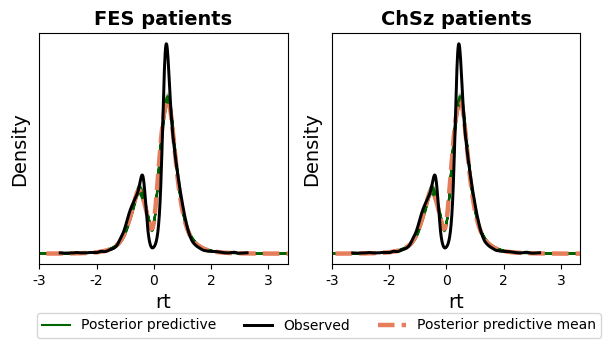

In [115]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

# ÂàõÂª∫ÁîªÂ∏É
fig, axes = plt.subplots(1, 2, figsize=(6, 3.5))
# Ëé∑ÂèñÂõæ‰æãÂè•ÊüÑÂíåÊ†áÁ≠æ
handles, labels = [], []
# ÂàÜÂà´ÁªòÂà∂‰∏§‰∏™ÁªÑÁöÑ PPC
group_titles = ['FES patients', 'ChSz patients']

for i, ax in enumerate(axes):
    plot = az.plot_ppc(
        m1_infdata,
        var_names=['rt'],
        num_pp_samples=500,
        random_seed=2024,
        flatten=['obs_id'],
        textsize=20,
        alpha=0.05,  # Èôç‰ΩéÈÄèÊòéÂ∫¶‰ΩøÂêéÈ™åÈ¢ÑÊµãÊõ¥Ê∏ÖÊô∞
        colors=['darkgreen', '#000000', '#E67E5B'],  # Âä†Ê∑±ÈªëËâ≤‰ª•Â¢ûÂä†ÂØπÊØîÂ∫¶
        mean=True,
        group="posterior",
        kind='kde',
        ax=ax,
        legend=False,
        data_pairs={
            "observed_data": {"Group": str(i+1)},
            "posterior_predictive": {"Group": str(i+1)}
        }
    )
    
    ax.set_title(group_titles[i], fontsize=14, fontweight='bold')
    ax.set_xlabel('rt', fontsize=14)
    ax.set_ylabel('Density', fontsize=14)
    ax.grid(False)
    
    # ËÆæÁΩÆÊñ∞ÁöÑxËΩ¥ËåÉÂõ¥ÂíåÂàªÂ∫¶
    ax.set_xlim(-3.0, 3.5)
    xticks = np.arange(-3.0, 3.5, 1.5)
    ax.set_xticks(xticks)
    ax.set_xticklabels([f'{x:.0f}' for x in xticks], rotation=0, fontsize=10)
    
    if i == 0:
        handles, labels = ax.get_legend_handles_labels()

# Ê∑ªÂä†ÂÖ®Â±ÄÂõæ‰æã
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.54, -0.05), ncol=3, fontsize='medium')
# Ë∞ÉÊï¥Â∏ÉÂ±Ä
plt.tight_layout(rect=[0, 0, 1, 0.95])
# ‰øùÂ≠òÂõæÂÉè
plt.savefig('./5.PPCÊ£ÄÊµã-ËæìÂá∫/PPC-‰∏çÂêåÁªÑÂà´.jpg', dpi=1200, bbox_inches='tight')
plt.show()


/opt/conda/lib/python3.9/site-packages/arviz/plots/ppcplot.py:241: FutureWarning: color has been deprecated in favor of colors
  warnings.warn("color has been deprecated in favor of colors", FutureWarning)


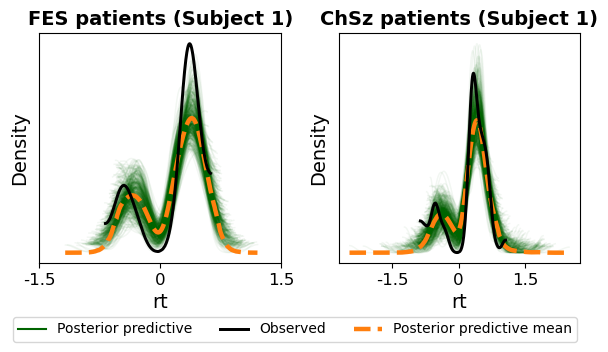

In [105]:
import arviz as az
import matplotlib.pyplot as plt

# ÈáçËÆæÂùêÊ†á
m1_infdata = m1_infdata.assign_coords(
    obs_id=m1_infdata.observed_data.coords['subj_idx'].values,
    groups="observed_vars"
)

# ÂàõÂª∫ÁîªÂ∏É
fig, axes = plt.subplots(1, 2, figsize=(6, 3.5))  # 1x2Â∏ÉÂ±ÄÁöÑÂ≠êÂõæ

# Ëé∑ÂèñÂõæ‰æãÂè•ÊüÑÂíåÊ†áÁ≠æ
lines = []
labels = []

# ÂÆö‰πâËßÇÂØüÁªÑÁöÑIDÂíåÊ†áÈ¢ò
obs_ids = [4, 2]  # ÈÄâÊã©‰∏çÂêåÁöÑ obs_id ‰Ωú‰∏∫‰æãÂ≠ê
group_titles = ['FES patients (Subject 1)', 'ChSz patients (Subject 1)']  # ËÆæÁΩÆÊ†áÈ¢ò

# ÁªòÂà∂ÊØè‰∏™Â≠êÂõæ
for i, ax in enumerate(axes):
    az.plot_ppc(
        m1_infdata,  # ÊõøÊç¢‰∏∫ m1_infdata
        var_names='rt',
        coords={'obs_id': [obs_ids[i]]},  # ‰ΩøÁî®ÂΩìÂâç obs_id
        num_pp_samples=500,  # ËÆæÁΩÆÂêéÈ™åÊ†∑Êú¨Êï∞Èáè
        random_seed=2023,
        flatten=[],
        textsize=20,  # Ë∞ÉÊï¥ÊñáÊú¨Â§ßÂ∞è
        alpha=0.05,    # ËÆæÁΩÆÊõ¥‰ΩéÁöÑÈÄèÊòéÂ∫¶
        color='darkgreen',  # ËÆæÁΩÆÈ¢úËâ≤
        ax=ax,  # Âú®ÊåáÂÆöÂ≠êÂõæ‰∏≠ÁªòÂà∂
        kind='kde',  # ‰ΩøÁî®Ê†∏ÂØÜÂ∫¶‰º∞ËÆ°ÔºàkdeÔºâÁªòÂõæ
    )

    # ËÆæÁΩÆÊØè‰∏™Â≠êÂõæÁöÑÊ†áÈ¢òÂíåÊ†áÁ≠æ
    ax.set_title(group_titles[i], fontsize=14, fontweight='bold')  # ËÆæÁΩÆÊ†áÈ¢òÂ≠ó‰ΩìÂíåÂ§ßÂ∞è
    ax.set_xlabel('rt', fontsize=14)  # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æ
    ax.set_ylabel('Density', fontsize=14)  # ËÆæÁΩÆyËΩ¥Ê†áÁ≠æ

    # ÈöêËóèÁΩëÊ†ºÁ∫ø
    ax.grid(False)

    # Ëá™ÂÆö‰πâxËΩ¥ÂàªÂ∫¶ÂíåÊ†áÁ≠æ
    ax.set_xticks([-1.5, 0, 1.5])  # ËÆæÁΩÆxËΩ¥ÂàªÂ∫¶
    ax.set_xticklabels(['-1.5', '0', '1.5'], fontsize=12)  # ËÆæÁΩÆxËΩ¥ÂàªÂ∫¶Ê†áÁ≠æ

    # Ëé∑ÂèñÂõæ‰æãÂè•ÊüÑÔºàlinesÔºâÂíåÊ†áÁ≠æÔºàlabelsÔºâÔºåÂè™ÂèñÁ¨¨‰∏Ä‰∏™Â≠êÂõæÁöÑ
    if i == 0:
        handle, label = ax.get_legend_handles_labels()
        lines.extend(handle)
        labels.extend(label)

# ÁßªÈô§Â≠êÂõæ‰∏≠ÁöÑÂõæ‰æã
for ax in axes:
    ax.legend().set_visible(False)

# Â∞ÜÂÖ®Â±ÄÂõæ‰æãÊ∑ªÂä†Âà∞ÂõæÂ§ñ
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3, fontsize=10)

# Ë∞ÉÊï¥Â∏ÉÂ±ÄÔºåÈÅøÂÖçÈáçÂè†
plt.tight_layout(rect=[0, 0, 1, 0.95])

# ‰øùÂ≠òÈ´òÂàÜËæ®ÁéáÂõæÂÉè
plt.savefig('./5.PPCÊ£ÄÊµã-ËæìÂá∫/Âçï‰∏™Ë¢´ËØïPPC_m1.jpg', dpi=1200, bbox_inches='tight')
plt.show()

/opt/conda/lib/python3.9/site-packages/arviz/plots/ppcplot.py:241: FutureWarning: color has been deprecated in favor of colors
  warnings.warn("color has been deprecated in favor of colors", FutureWarning)


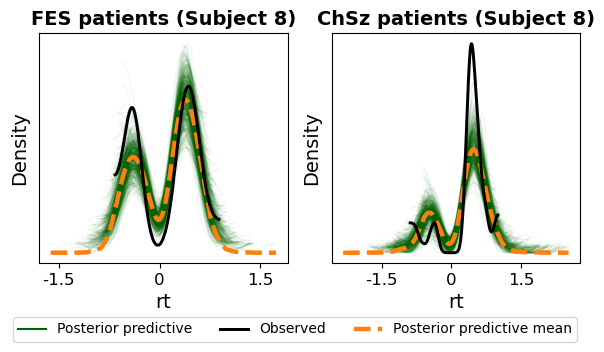

In [119]:
import arviz as az
import matplotlib.pyplot as plt

# ÈáçËÆæÂùêÊ†á
m1_infdata = m1_infdata.assign_coords(
    obs_id=m1_infdata.observed_data.coords['subj_idx'].values,
    groups="observed_vars"
)

# ÂàõÂª∫ÁîªÂ∏É
fig, axes = plt.subplots(1, 2, figsize=(6, 3.5))  # 1x2Â∏ÉÂ±ÄÁöÑÂ≠êÂõæ

# Ëé∑ÂèñÂõæ‰æãÂè•ÊüÑÂíåÊ†áÁ≠æ
lines = []
labels = []

# ÂÆö‰πâËßÇÂØüÁªÑÁöÑIDÂíåÊ†áÈ¢ò
obs_ids = [20,23]  # ÈÄâÊã©‰∏çÂêåÁöÑ obs_id ‰Ωú‰∏∫‰æãÂ≠ê
group_titles = ['FES patients (Subject 8)', 'ChSz patients (Subject 8)']  # ËÆæÁΩÆÊ†áÈ¢ò

# ÁªòÂà∂ÊØè‰∏™Â≠êÂõæ
for i, ax in enumerate(axes):
    az.plot_ppc(
        m1_infdata,  # ÊõøÊç¢‰∏∫ m1_infdata
        var_names='rt',
        coords={'obs_id': [obs_ids[i]]},  # ‰ΩøÁî®ÂΩìÂâç obs_id
        num_pp_samples=500,  # ËÆæÁΩÆÂêéÈ™åÊ†∑Êú¨Êï∞Èáè
        random_seed=2023,
        flatten=[],
        textsize=20,  # Ë∞ÉÊï¥ÊñáÊú¨Â§ßÂ∞è
        alpha=0.05,    # ËÆæÁΩÆÊõ¥‰ΩéÁöÑÈÄèÊòéÂ∫¶
        color='darkgreen',  # ËÆæÁΩÆÈ¢úËâ≤
        ax=ax,  # Âú®ÊåáÂÆöÂ≠êÂõæ‰∏≠ÁªòÂà∂
        kind='kde',  # ‰ΩøÁî®Ê†∏ÂØÜÂ∫¶‰º∞ËÆ°ÔºàkdeÔºâÁªòÂõæ
    )

    # ËÆæÁΩÆÊØè‰∏™Â≠êÂõæÁöÑÊ†áÈ¢òÂíåÊ†áÁ≠æ
    ax.set_title(group_titles[i], fontsize=14, fontweight='bold')  # ËÆæÁΩÆÊ†áÈ¢òÂ≠ó‰ΩìÂíåÂ§ßÂ∞è
    ax.set_xlabel('rt', fontsize=14)  # ËÆæÁΩÆxËΩ¥Ê†áÁ≠æ
    ax.set_ylabel('Density', fontsize=14)  # ËÆæÁΩÆyËΩ¥Ê†áÁ≠æ

    # ÈöêËóèÁΩëÊ†ºÁ∫ø
    ax.grid(False)

    # Ëá™ÂÆö‰πâxËΩ¥ÂàªÂ∫¶ÂíåÊ†áÁ≠æ
    ax.set_xticks([-1.5, 0, 1.5])  # ËÆæÁΩÆxËΩ¥ÂàªÂ∫¶
    ax.set_xticklabels(['-1.5', '0', '1.5'], fontsize=12)  # ËÆæÁΩÆxËΩ¥ÂàªÂ∫¶Ê†áÁ≠æ

    # Ëé∑ÂèñÂõæ‰æãÂè•ÊüÑÔºàlinesÔºâÂíåÊ†áÁ≠æÔºàlabelsÔºâÔºåÂè™ÂèñÁ¨¨‰∏Ä‰∏™Â≠êÂõæÁöÑ
    if i == 0:
        handle, label = ax.get_legend_handles_labels()
        lines.extend(handle)
        labels.extend(label)

# ÁßªÈô§Â≠êÂõæ‰∏≠ÁöÑÂõæ‰æã
for ax in axes:
    ax.legend().set_visible(False)

# Â∞ÜÂÖ®Â±ÄÂõæ‰æãÊ∑ªÂä†Âà∞ÂõæÂ§ñ
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 0.05), ncol=3, fontsize=10)

# Ë∞ÉÊï¥Â∏ÉÂ±ÄÔºåÈÅøÂÖçÈáçÂè†
plt.tight_layout(rect=[0, 0, 1, 0.95])

# ‰øùÂ≠òÈ´òÂàÜËæ®ÁéáÂõæÂÉè
plt.savefig('./5.PPCÊ£ÄÊµã-ËæìÂá∫/Âçï‰∏™Ë¢´ËØïPPC_m1-103.jpg', dpi=1200, bbox_inches='tight')
plt.show()

In [19]:
print("‰ª£Á†ÅÂÖ®ÈÉ®ÂÆåÊàê!")

‰ª£Á†ÅÂÖ®ÈÉ®ÂÆåÊàê!
